# K-Nearest Neighbors #

K-Nearest Neighbors (KNN) is a ML model that classifies each sample by its distance to neighboring data points. KNN is a classification algorithm, so it is based on having a training dataset whose labels are known ahead of time. From all of this training data, the algorithm finds the closest `k` neighbors to any new sample and it ignores all of the others. From those closest `k` neighbors, the algorithm selects whichever label is most common.

For example, consider a dataset that contains two labels: black and green. KNN might be used to predict the label of a new sample, which has been drawn as a red dot. In this particular case, the value of `k` is 5 and the five closest neighbors include three black samples and two green samples. Since there are more black labels than green labels, the new point will be clasified as black.

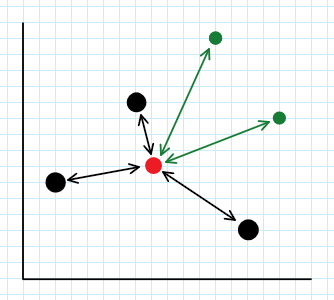

Most of the time, KNN uses Euclidean Distance to find the nearest neighbors although other distance metrics are possible. One such example is Manhattan Distance. In the same way, KNN typically uses majority voting to determine the winning label but other voting techniques are possible such as weighted voting.

### References: ###
* [MachineLearning — KNN Using SciKit-Learn by Sanjay.M](https://medium.com/towards-data-science/knn-using-scikit-learn-c6bed765be75)
* [Everything You Ever Wanted to Know About K-Nearest Neighbors by Tyler Folkman](https://towardsdatascience.com/everything-you-ever-wanted-to-know-about-k-nearest-neighbors-dab986e21b60)
* [How to Find the Optimal Value of K in KNN? by Amey Band](https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb)

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Dataset ##

A former CUI mathematician and waterpolo player, Marius, created a beverage classifier as part of his senior research project. Marius wrote a KNN classifier that would predict whether a drink was beer or wine based on its color and alcohol content.

Data collection was one of the hardest parts of this beverage classifier project. Marius used a small camera-like device called a colorimeter to measure the color of each drink. The color readings were given in 24-bit hex values that represented the RGB components of each color. Marius obtained the alcohol content by reading the nutrition information on each beverage's package label.

Early on in the project, Marius discovered that his model gave inaccurate predictions. He correctly diagnosed the problem by manually looking up the color of each beverage. Marius found that the RGB values he had recorded did not look like the color of the drinks. The problem was that he had measured the color of each beverage at different times of the day under different lighting conditions. To make matters worse, the beverages were translucent in color and whatever was behind the drink would tint its image. Marius re-measured all of the colors and his results improved significantly.

In [23]:
filename = 'drink_data_from_marius.csv'
if filename[-3:] == "csv":
    df = pd.read_csv(filename)

labels = [ "Green", "Blue", "Type"]
df = df[labels]
df["Type"] = df["Type"].map({'Wine': 0,'Beer':1})
data = df.values

In [24]:



data

array([[ 68,   7,   0],
       [ 54,   5,   0],
       [193,   1,   1],
       [157,   0,   1],
       [ 45,   3,   0],
       [ 37,   3,   0],
       [141,   3,   1],
       [ 43,  15,   0],
       [110,  18,   1],
       [242,  26,   1],
       [244,  56,   1],
       [ 35,   4,   0],
       [218,  38,   1],
       [229,  16,   1],
       [ 48,  18,   0],
       [243,   2,   1],
       [226,  16,   1],
       [ 44,  22,   0],
       [196,   6,   1],
       [ 40,   3,   0],
       [238,  75,   1],
       [173,   5,   1],
       [202,  46,   1],
       [129,  96,   0],
       [ 67,  41,   0],
       [ 33,   7,   0],
       [ 42,   5,   0],
       [136,   8,   1],
       [151,   6,   1],
       [122,   5,   1],
       [ 17,   6,   0],
       [ 31,   8,   1],
       [133,  17,   1],
       [ 32,  11,   0],
       [ 84,  65,   0],
       [ 28,  14,   0],
       [ 36,   9,   0],
       [ 16,   5,   0],
       [ 29,  21,   0],
       [ 23,   8,   0],
       [ 66,  50,   0]])

## Train/Test Split ##

Supervised learning algorithms require you to divide the labeled data into two sets: the training set and the test set. The training set will be used find patterns in the data and create a model. The test data will be used to evaluate the accuracy of the model. Usually the training set is much bigger than the test set.

Once you set some of the data aside for testing, you cannotuse it to tune the model. Any and all tuning must be performed using only the training data. Once you are satisified that the model is of sufficient quality, then you test it. If you are unhappy with the test results, then you must gather new test data before going back and retuning the model.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = df[[ "Green", "Blue"]]
y = df["Type"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Training Data:   {X_train.shape}")
print(f"Training Labels: {y_train.shape}")
X_train.head()
X_train_scaled

Training Data:   (32, 2)
Training Labels: (32,)


array([[0.10132159, 0.02105263],
       [0.2246696 , 0.06315789],
       [0.        , 0.05263158],
       [0.22026432, 0.42105263],
       [0.49339207, 1.        ],
       [0.11894273, 0.22105263],
       [0.78854626, 0.05263158],
       [0.51101322, 0.16842105],
       [0.59030837, 0.05263158],
       [0.08810573, 0.02105263],
       [0.68722467, 0.04210526],
       [0.46255507, 0.04210526],
       [0.7753304 , 0.        ],
       [0.40969163, 0.17894737],
       [0.52422907, 0.07368421],
       [0.12334802, 0.02105263],
       [0.13656388, 0.17894737],
       [0.88546256, 0.38947368],
       [0.0660793 , 0.10526316],
       [0.08370044, 0.08421053],
       [0.11013216, 0.04210526],
       [0.29515419, 0.67368421],
       [0.9339207 , 0.15789474],
       [0.07929515, 0.03157895],
       [0.16299559, 0.04210526],
       [0.07048458, 0.06315789],
       [0.92070485, 0.15789474],
       [0.99559471, 0.01052632],
       [0.97356828, 0.77894737],
       [0.04845815, 0.13684211],
       [0.

In [26]:
# Three lines runs the actual algorithm
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [27]:
scores = pd.DataFrame(data={"Prediction":y_pred, "Truth":y_test})
scores["Result"] = scores['Prediction'] == scores['Truth']
scores


,Prediction,Truth,Result
6,1,1,True
22,1,1,True
31,0,1,False
40,0,0,True
37,0,0,True
38,0,0,True
3,1,1,True
7,0,0,True
39,0,0,True


In [28]:
# What was the sample that we predicted incorrectly? ...that beer is awfully red
df.loc[31]


Green    31
Blue      8
Type      1
Name: 31, dtype: int64

## Evaluating the Model ##

The basic metrics used to evaluate classification algorithm are easy to understand for binary classifiers: accuracy, precision, and recall. They are based on knowing the difference between a true positive, false positive, true negative, and false negative. We also have to assign one of the two labels to be the positive case. In this situation, we'll consider `Beer` to be the positive class.

In [29]:
tp = scores[(scores["Prediction"] == "Beer") & (scores["Truth"] == "Beer")].shape[0]
fp = scores[(scores["Prediction"] == "Beer") & (scores["Truth"] != "Beer")].shape[0]
tn = scores[(scores["Prediction"] == "Wine") & (scores["Truth"] == "Wine")].shape[0]
fn = scores[(scores["Prediction"] == "Wine") & (scores["Truth"] != "Wine")].shape[0]

accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy:  {accuracy}")

precision = tp / (tp + fp)
print(f"Precision: {precision}")

recall = tp / (tp + fn)
print(f"Recall:    {recall}")

ZeroDivisionError: division by zero

In [ ]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, pos_label='Beer')
recall = metrics.recall_score(y_test, y_pred, pos_label='Beer')

print(f"Accuracy:  {accuracy}")
print(f"Precision: {precision}")
print(f"Recall:    {recall}")

## Exercise ##

Why did we only get 89% accuracy? You'd think that a simple beverage classifier like this one would always be able to differentiate between beer and wine. What, if anything, could have gone wrong? What, if anything, could we do to fix it?

Your assignment is to explore the data to figure out why our KNN classifier is only scoring 89% accuracy. Once you have spotted the reason for this poor score, find a way to fix it. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = df[["Red", "Green", "Blue", "Alcohol(%)"]]
y = df["Type"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Training Data:   {X_train.shape}")
print(f"Training Labels: {y_train.shape}")
X_train.head()
X_train_scaled

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
scores = pd.DataFrame(data={"Prediction":y_pred, "Truth":y_test})
scores["Result"] = scores['Prediction'] == scores['Truth']
scores

In [ ]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, pos_label='Beer')
recall = metrics.recall_score(y_test, y_pred, pos_label='Beer')

print(f"Accuracy:  {accuracy}")
print(f"Precision: {precision}")
print(f"Recall:    {recall}")

In [30]:
print("^Why? I normalized and still nothing^")

^Why? I normalized and still nothing^
